In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Get the data

In [2]:
df = pd.read_csv("marketing_customer_analysis.csv")

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Dealing with the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))]
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

In [14]:
df.head(2)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [8]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [15]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


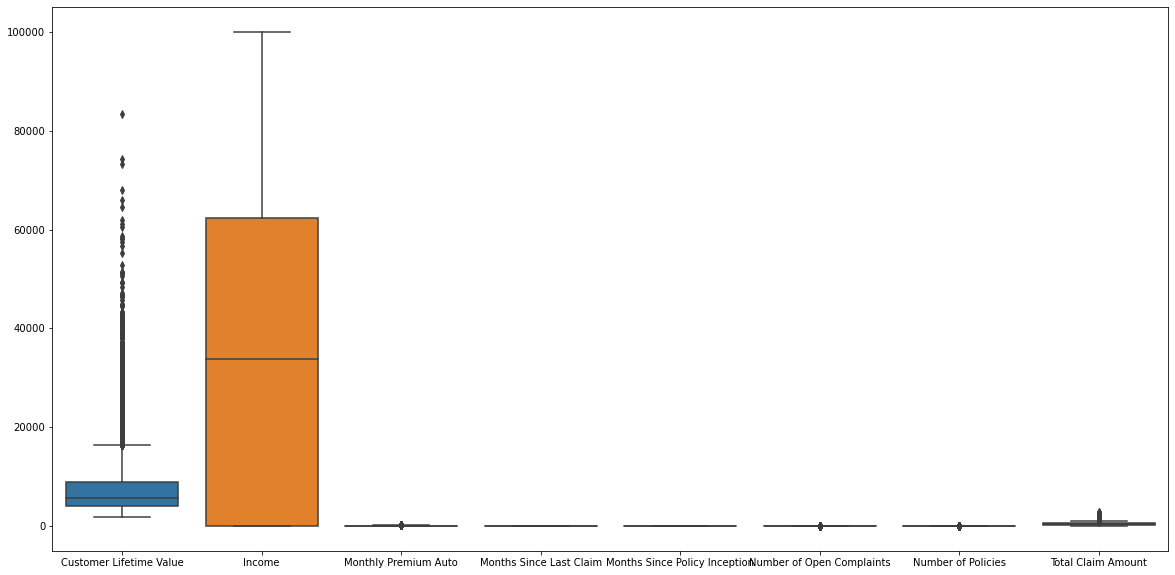

In [12]:
plt.figure(figsize=(20,10))

plot1 = sns.boxplot(data=df)

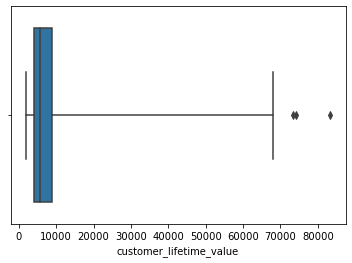

In [22]:
plot2 = sns.boxplot(x=df['customer_lifetime_value'],whis=12)

In [23]:
iqr = np.percentile(df['customer_lifetime_value'],75) - np.percentile(df['customer_lifetime_value'],25) # data['IC1'].quantile(0.75)
iqr

4967.915247000001

In [24]:
np.percentile(df['customer_lifetime_value'],75)

8962.16704125

In [25]:
# define the limits
upper_limit = np.percentile(df['customer_lifetime_value'],75) + 12*iqr
lower_limit = np.percentile(df['customer_lifetime_value'],25) - 12*iqr
upper_limit, lower_limit

(68577.15000525, -55620.73116975001)

In [26]:
#Checking for outliers column :
data1 = df[(df['customer_lifetime_value']<lower_limit) & (df['customer_lifetime_value']>upper_limit)]
data1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


In [27]:
df.shape

(9134, 24)

In [28]:
# remove them from the data
df = df[(df['customer_lifetime_value']>lower_limit) & (df['customer_lifetime_value']<upper_limit)]
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [30]:
df.shape

(9131, 24)

### Explore the data

Text(0.5, 1.0, 'Total number of responses')

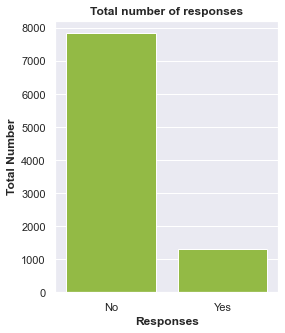

In [33]:
# plot of the total number of responses

a = df['response'].value_counts()
plt.figure(figsize = (4,5))
sns.set(style='darkgrid')
plot1 = sns.barplot(data = df, x = a.index, y= a,color="yellowgreen")
plt.xlabel("Responses", weight = 'bold',size = 12)
plt.ylabel("Total Number", weight = 'bold',size = 12)
plt.title("Total number of responses",weight = 'bold',size = 12)

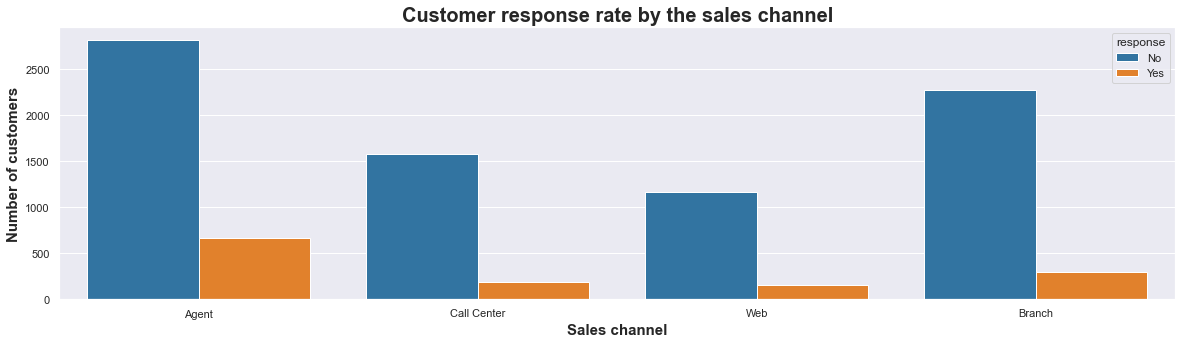

In [38]:
plt.figure(figsize=(20, 5))
sns.set(style='darkgrid')
color = ['green','red']
plot2 = sns.countplot(data = df,x='sales_channel', hue = 'response', palette='tab10')
plt.title('Customer response rate by the sales channel',weight='bold',size = 20)
plt.xlabel('Sales channel', weight='bold',size = 15)
plt.ylabel('Number of customers', weight='bold',size = 15)
plt.show()

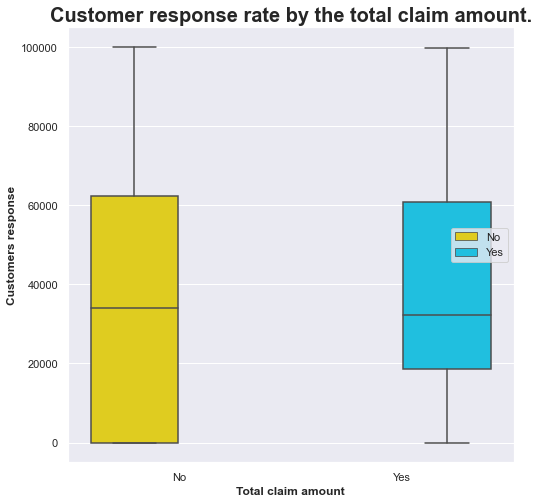

In [41]:
# plot of the response rate by income
plt.figure(figsize=(8,8))
plot5 = sns.boxplot(data=df, y = 'income', x = 'response', hue = 'response',palette='jet_r')
plt.title('Customer response rate by the total claim amount.', weight ='bold',fontsize = 20)
plt.xlabel('Total claim amount', weight='bold',fontsize = 12)
plt.ylabel('Customers response', weight='bold',fontsize = 12)
plt.legend(markerscale=2)

## Processing Data

In [7]:
numerical = df.select_dtypes(include = np.number)
categorical = df.select_dtypes(include = np.object)

In [28]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [29]:
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [30]:
numerical.shape

(9134, 8)

In [31]:
categorical.shape

(9134, 16)

 - **Constructing distribution plots for numerical variables**

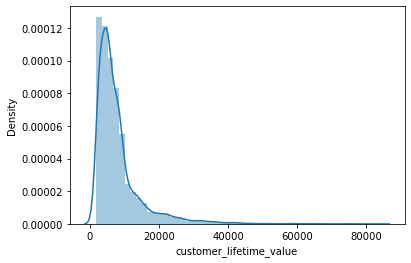

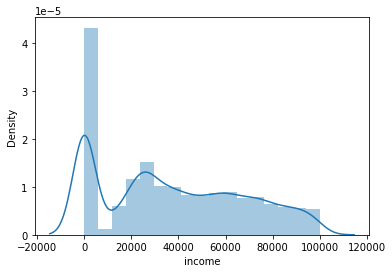

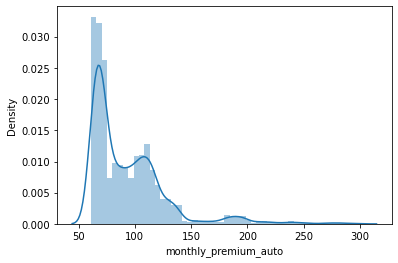

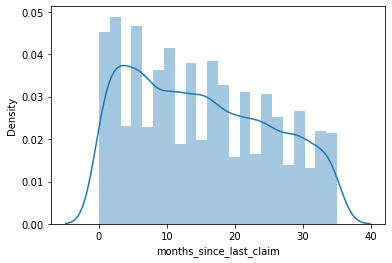

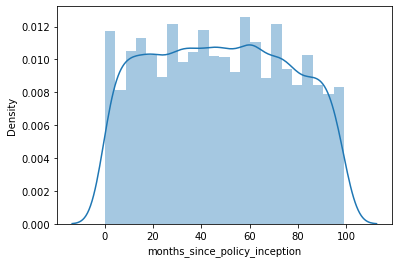

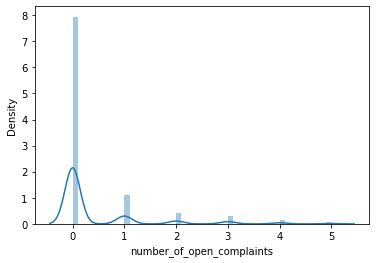

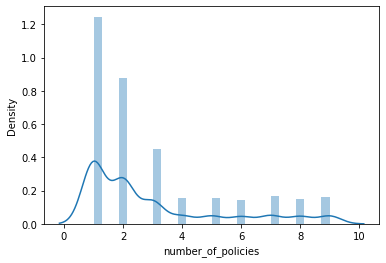

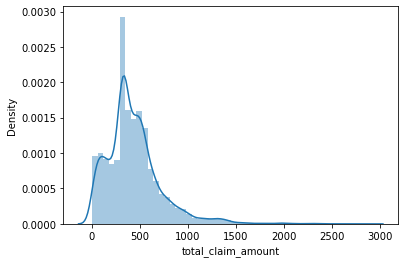

In [32]:
for column in numerical.columns:
    sns.distplot(numerical[column])  # takes to see the distribution
    plt.show()

#### X-y split.

In [8]:
y = numerical['total_claim_amount']  
x = numerical.drop(['total_claim_amount'], axis=1)
x.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [56]:
x.shape

(9134, 7)

**scaling data using MinMaxScaler**

In [9]:
transformer = MinMaxScaler().fit(x) ### USE MINMAX FOR NORMALIZING
x_minmax = transformer.transform(x) #This is a an array of arrays
print(x_minmax.shape)

(9134, 7)


In [68]:
x_minmax

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.05050505, 0.        ,
        0.        ],
       [0.06240565, 0.        , 0.13924051, ..., 0.42424242, 0.        ,
        0.875     ],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.38383838, 0.        ,
        0.125     ],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.37373737, 0.6       ,
        0.125     ],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.03030303, 0.        ,
        0.25      ],
       [0.00876645, 0.        , 0.06751055, ..., 0.90909091, 0.        ,
        0.        ]])

In [10]:
# converting minmax array into dataframe
x_norm = pd.DataFrame(x_minmax,columns=x.columns)
x_norm.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


### customer_lifetime_value

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

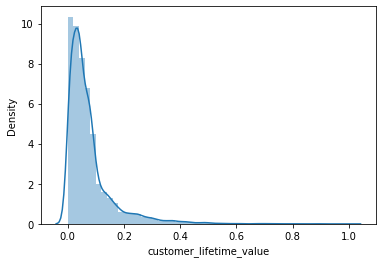

In [11]:
sns.distplot(x_norm['customer_lifetime_value'])

### Income

<AxesSubplot:xlabel='income', ylabel='Density'>

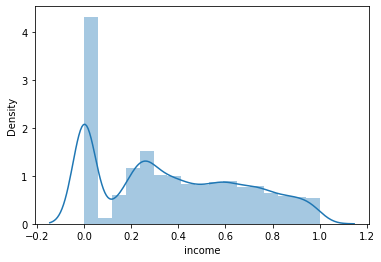

In [12]:
sns.distplot(x_norm['income'])

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

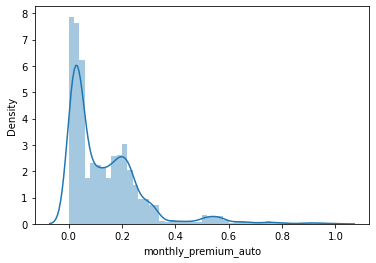

In [13]:
sns.distplot(x_norm['monthly_premium_auto'])

<AxesSubplot:xlabel='months_since_last_claim', ylabel='Density'>

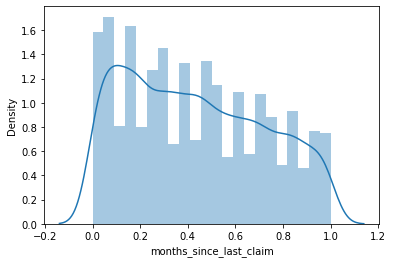

In [14]:
sns.distplot(x_norm['months_since_last_claim'])

<AxesSubplot:xlabel='months_since_policy_inception', ylabel='Density'>

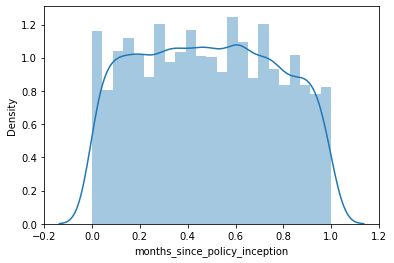

In [15]:
sns.distplot(x_norm['months_since_policy_inception'])

<AxesSubplot:xlabel='number_of_open_complaints', ylabel='Density'>

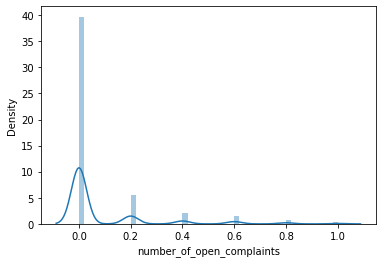

In [16]:
sns.distplot(x_norm['number_of_open_complaints'])

<AxesSubplot:xlabel='number_of_policies', ylabel='Density'>

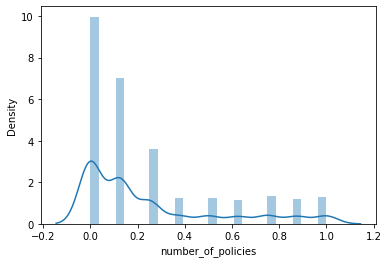

In [17]:
sns.distplot(x_norm['number_of_policies'])